In [1]:
from datetime import datetime
from dateutil import tz
from pathlib import Path
import neuroconv
import h5py
import nexusformat.nexus as nx
#from neuroconv.datainterfaces import ScanImageImagingInterface, ScanImageTiffMultiPlaneImagingInterface, Hdf5ImagingInterface

In [4]:
def h5_tree(val, pre=''):
    items = len(val)
    for key, val in val.items():
        items -= 1
        if items == 0:
            # the last item
            if type(val) == h5py._hl.group.Group:
                print(pre + '└── ' + key)
                h5_tree(val, pre+'    ')
            else:
                print(pre + '└── ' + key + ' (%d)' % len(val))
        else:
            if type(val) == h5py._hl.group.Group:
                print(pre + '├── ' + key)
                h5_tree(val, pre+'│   ')
            else:
                print(pre + '├── ' + key + ' (%d)' % len(val))

In [3]:
file_path = '/v-data2/david_meyer/2pRAM_Ben_recordings/20230808_R109/20230808_R109_1p3x1p3mm_mpfc_saline/100perc_1p3x1p3_17p27hz_00001_00001.tif'
#interface = ScanImageImagingInterface(file_path=file_path, verbose=False)
interface = ScanImageTiffMultiPlaneImagingInterface(file_path=file_path, verbose=False)
metadata = interface.get_metadata()
# For data provenance we add the time zone information to the conversion
session_start_time = metadata["NWBFile"]["session_start_time"].replace(tzinfo=tz.gettz("US/Pacific")) if "session_start_time" in metadata["NWBFile"] else datetime(2020, 1, 1, 12, 30, 0, tzinfo=tz.gettz("US/Pacific"))
metadata["NWBFile"].update(session_start_time=session_start_time)

NameError: name 'ScanImageTiffMultiPlaneImagingInterface' is not defined

In [ ]:
from nwbwidgets.panel import Panel

Panel()

Panel(children=(HBox(children=(VBox(children=(RadioButtons(layout=Layout(width='100px'), options=('Local file'…

In [ ]:
# Choose a path for saving the nwb file and run the conversion
nwbfile_path = f"/data0/tn/devel/shell_file_utils/nwb_test_1.nwb"
interface.run_conversion(nwbfile_path=nwbfile_path, metadata=metadata)

In [ ]:
file_path = '/v-data2/david_meyer/2pRAM_Ben_recordings/20230914_R110/20230915_R110_5x5p25mm_lower_left_ketamine/preProcessed/TMP70perc_5x5p25mm_2p09Hz_00001_plane_1.mat'
interface = Hdf5ImagingInterface(file_path=file_path, verbose=False, mov_field='Y', sampling_frequency=5)

metadata = interface.get_metadata()
# For data provenance we add the time zone information to the conversion
session_start_time = datetime(2020, 1, 1, 12, 30, 0, tzinfo=tz.gettz("US/Pacific"))
metadata["NWBFile"].update(session_start_time=session_start_time)

ValueError: not enough values to unpack (expected 4, got 3)

In [ ]:
# Choose a path for saving the nwb file and run the conversion
nwbfile_path = f"{path_to_save_nwbfile}"
interface.run_conversion(nwbfile_path=nwbfile_path, metadata=metadata)

In [ ]:
import lbmhdf5imagingextractor as lbm
file_path = '/v-data2/david_meyer/2pRAM_Ben_recordings/20230914_R110/20230915_R110_5x5p25mm_lower_left_ketamine/preProcessed/TMP70perc_5x5p25mm_2p09Hz_00001_plane_1.mat'
imex = lbm.LbmHdf5ImagingExtractor(file_path=file_path)
fr = imex.get_frames(3, 4)

In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:
import lbmhdf5imagingextractor as lbm
#folder_path = '/v-data2/david_meyer/2pRAM_Ben_recordings/20230914_R110/20230915_R110_5x5p25mm_lower_left_ketamine/preProcessed/'
folder_path = '/data0/tn/devel/shell_file_utils/'
volex = lbm.LbmHdf5MultiPlaneImagingExtractor(folder_path=folder_path)
vid = volex.get_video(3, 5)  
# 30 planes from /v-data2: 8 min. 3 planes from /data0: 6.5s

In [ ]:
volex._imaging_extractors[21]._video.shape

(1213, 1200, 1188)

In [ ]:
vid[1,:,:,3].mean()

97.642365

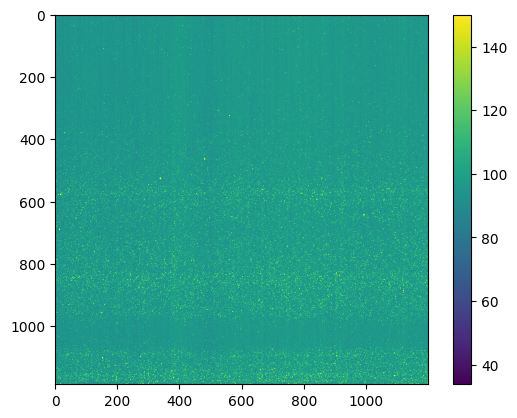

In [ ]:
from matplotlib import pyplot as plt
plt.figure()
plt.imshow(vid[0,:,:,3], vmax=150)
#plt.imshow(fr1
plt.colorbar()
plt.show()

In [17]:
folder_path = '/data0/tn/devel/shell_file_utils/'
import lbmhdf5imagingextractor as lbm
from datetime import datetime
from dateutil import tz
interface = lbm.LbmHdf5ImagingInterface(folder_path=folder_path, verbose=False)

metadata = interface.get_metadata()
# For data provenance we add the time zone information to the conversion
session_start_time = datetime(2020, 1, 1, 12, 30, 0, tzinfo=tz.gettz("US/Pacific"))
metadata["NWBFile"].update(session_start_time=session_start_time)

# Choose a path for saving the nwb file and run the conversion
nwbfile_path = '/data0/tn/devel/shell_file_utils/nwb_test_13.nwb'
interface.run_conversion(nwbfile_path=nwbfile_path, metadata=metadata)

In [18]:
# in latest run, output is /acquisition/TwoPhotonSeries/data Dataset {1213/1213, 1200/1200, 1188/1188, 3/3}, so that's still wrong. Should be: (frames, row, cols, planes)
# --> fixed by not transposing data in LbmHdf5ImagingExtractor. This is done later in imaginextractordatachunkiterator.py, line 140
3

3

In [ ]:
# self._video.shape in LbmHdf5ImagingInterface returns (1200, 1188, 1213), so (time, col, row)
# self._video[499,599,699]--> 64.050255
# self._video[699,599,499]--> 64.289795 == Y(500,600,700) in Matlab

#so, if I want element (r, c, t), then I have to get self._video[t-1, c-1, r-1] in Python

# resulting 4D dataset in NWB should have shape [frames, row, cols, planes]

In [ ]:
# Dimensions of a single plane as seen from Matlab:
m = matfile('/data0/tn/devel/shell_file_utils/TMP70perc_5x5p25mm_2p09Hz_00001_plane_1.mat')
m = 
  matlab.io.MatFile

  Properties:
              Properties.Source: '/data0/tn/devel/shell_file_utils/TMP70perc_5x5p25mm_2p09Hz_00001_plane_1.mat'
            Properties.Writable: false                                                                         
    Properties.ProtectedLoading: false                                                                         
                              Y: [3-D       single]                                                            
                             Ym: [1213x1188 single]                                                            
                pixelResolution: [1x1       double]                                                            
                           sizY: [1x3       double]                                                            
                     volumeRate: [1x1       double]                                                            

  Methods

>> size(m, 'Y')
ans =
        1213        1188        1200
# dimension order; row, col, time

>> Y(500,600,700)
ans =
  single
   64.2898
>> 

In [19]:
f = nx.nxload(nwbfile_path)
print(f.tree)

root:NXroot
  @.specloc = '<HDF5 object reference>'
  @namespace = 'core'
  @neurodata_type = 'NWBFile'
  @nwb_version = '2.6.0'
  @object_id = '4f4b642c-5899-4c00-acce-ac5fea577eb3'
  acquisition:NXgroup
    TwoPhotonSeries:NXgroup
      @comments = 'no comments'
      @description = 'Imaging data from two-photon excitation micros...'
      @namespace = 'core'
      @neurodata_type = 'TwoPhotonSeries'
      @object_id = '31acc4c0-8bfb-4234-87e1-4eba7de634d6'
      data = float32(1200x1188x1213x3)
        @conversion = 1.0
        @offset = 0.0
        @resolution = -1.0
        @unit = 'n.a.'
      dimension = [1213 1188    3]
      imaging_plane:NXgroup -> /general/optophysiology/ImagingPlane
        @namespace = 'core'
        @neurodata_type = 'ImagingPlane'
        @object_id = 'd75ee28a-a489-45ea-ace6-91cff6f2dc6c'
        channel_0:NXgroup
          @namespace = 'core'
          @neurodata_type = 'OpticalChannel'
          @object_id = 'd38593cf-02f4-43e6-8c20-93a5e99ba083'
    

In [20]:
f = h5py.File(nwbfile_path, 'r')


In [21]:
data_from_nwb = f['/acquisition/TwoPhotonSeries/data']
data_from_nwb.shape

(1200, 1188, 1213, 3)

700.2894
87.422615


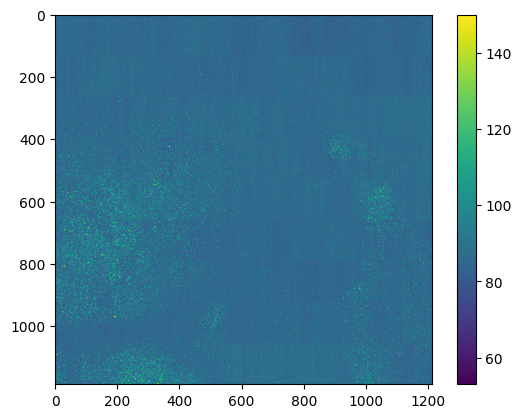

In [26]:
from matplotlib import pyplot as plt
frm = data_from_nwb[1000,:,:,2]
print(frm.max())
print(frm.mean())
plt.figure()
plt.imshow(data_from_nwb[1000,:,:,2], vmax=150)
#plt.imshow(fr1
plt.colorbar()
plt.show()

In [27]:
# Matlab:
# m = matfile('/data0/tn/devel/shell_file_utils/TMP70perc_5x5p25mm_2p09Hz_00001_plane_3.mat');
# frm = m.Y(:,:,1001);
# max(frm(:))
# ans =
#  single
#  700.2894
# mean(frm(:))
# ans =
#  single
#   87.4226
## image appears identical when plotted like this
# figure; imagesc(frm'); axis image; colorbar; caxis([0 150])

SyntaxError: invalid syntax (2665414927.py, line 3)